In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


In [6]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes'].value_counts()

Classes
fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [10]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
241,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [11]:
df['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

In [12]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [13]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [14]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
237    6.5
238    0.0
239    0.2
240    0.7
241    0.5
Name: FWI, Length: 242, dtype: float64

In [15]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [17]:
X_train.shape,X_test.shape

((181, 11), (61, 11))

# Feature Selection (Important)

In [18]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650346,-0.302105,-0.329711,0.703237,0.494261,0.377424,0.617606,0.466352,0.525551,0.249598
RH,-0.650346,1.000000,0.266525,0.234932,-0.634330,-0.413931,-0.246125,-0.693939,-0.364136,-0.435094,-0.364007
Ws,-0.302105,0.266525,1.000000,0.219681,-0.171843,0.000277,0.105115,0.005360,0.038701,-0.059470,-0.235477
Rain,-0.329711,0.234932,0.219681,1.000000,-0.546501,-0.286855,-0.300276,-0.346706,-0.297934,-0.386323,-0.065132
FFMC,0.703237,-0.634330,-0.171843,-0.546501,1.000000,0.621240,0.537884,0.751558,0.610780,0.780805,0.222702
DMC,0.494261,-0.413931,0.000277,-0.286855,0.621240,1.000000,0.876734,0.693404,0.983698,0.613507,0.196778
DC,0.377424,-0.246125,0.105115,-0.300276,0.537884,0.876734,1.000000,0.548992,0.946992,0.546427,-0.081403
ISI,0.617606,-0.693939,0.005360,-0.346706,0.751558,0.693404,0.548992,1.000000,0.659589,0.749722,0.266275
BUI,0.466352,-0.364136,0.038701,-0.297934,0.610780,0.983698,0.946992,0.659589,1.000000,0.609708,0.096607
Classes,0.525551,-0.435094,-0.059470,-0.386323,0.780805,0.613507,0.546427,0.749722,0.609708,1.000000,0.161852


<Axes: >

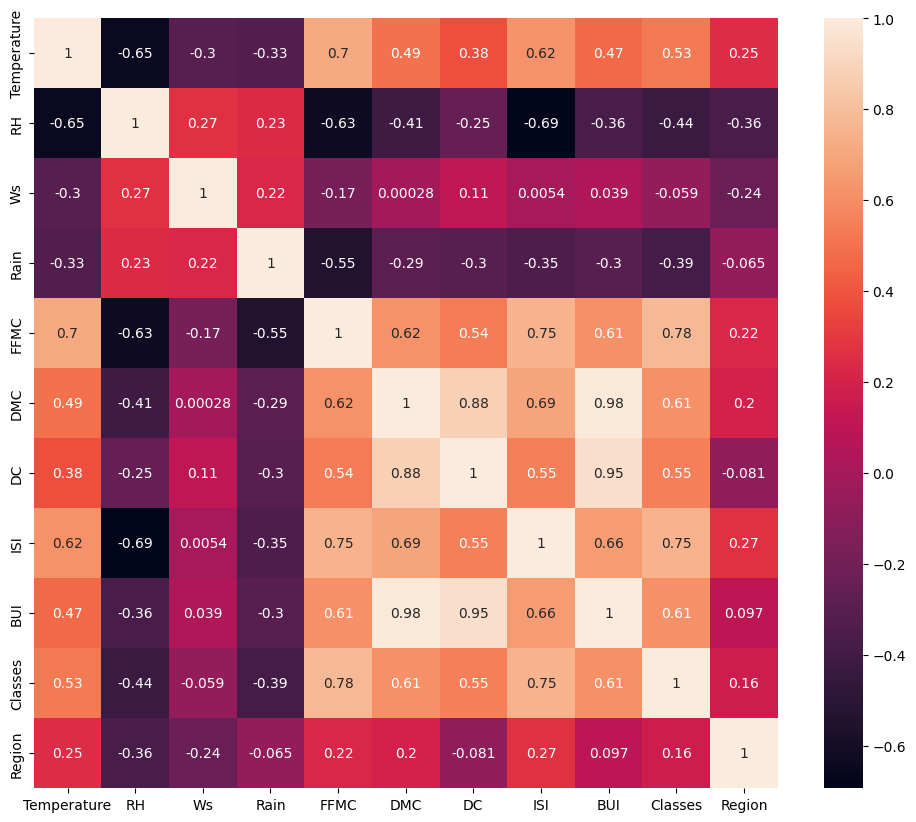

In [19]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [20]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650346,-0.302105,-0.329711,0.703237,0.494261,0.377424,0.617606,0.466352,0.525551,0.249598
RH,-0.650346,1.000000,0.266525,0.234932,-0.634330,-0.413931,-0.246125,-0.693939,-0.364136,-0.435094,-0.364007
Ws,-0.302105,0.266525,1.000000,0.219681,-0.171843,0.000277,0.105115,0.005360,0.038701,-0.059470,-0.235477
Rain,-0.329711,0.234932,0.219681,1.000000,-0.546501,-0.286855,-0.300276,-0.346706,-0.297934,-0.386323,-0.065132
FFMC,0.703237,-0.634330,-0.171843,-0.546501,1.000000,0.621240,0.537884,0.751558,0.610780,0.780805,0.222702
DMC,0.494261,-0.413931,0.000277,-0.286855,0.621240,1.000000,0.876734,0.693404,0.983698,0.613507,0.196778
DC,0.377424,-0.246125,0.105115,-0.300276,0.537884,0.876734,1.000000,0.548992,0.946992,0.546427,-0.081403
ISI,0.617606,-0.693939,0.005360,-0.346706,0.751558,0.693404,0.548992,1.000000,0.659589,0.749722,0.266275
BUI,0.466352,-0.364136,0.038701,-0.297934,0.610780,0.983698,0.946992,0.659589,1.000000,0.609708,0.096607
Classes,0.525551,-0.435094,-0.059470,-0.386323,0.780805,0.613507,0.546427,0.749722,0.609708,1.000000,0.161852


In [21]:
len(X_train.columns)

11

In [22]:
X_train.iloc[0]

Temperature    29.0
RH             74.0
Ws             19.0
Rain            0.1
FFMC           75.8
DMC             3.6
DC             32.2
ISI             2.1
BUI             5.6
Classes         0.0
Region          0.0
Name: 97, dtype: float64

In [23]:
for i in range(0,len(X_train.columns)):
    print(i)

0
1
2
3
4
5
6
7
8
9
10


In [24]:
for i in range(len(X_train.columns)):
    for j in range(i):
        print(i,j)

1 0
2 0
2 1
3 0
3 1
3 2
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
5 4
6 0
6 1
6 2
6 3
6 4
6 5
7 0
7 1
7 2
7 3
7 4
7 5
7 6
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9


In [25]:
def correlation(dataset, threshold):
    # Create a set of col_corr
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(0,len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [26]:
## threshold-Domain expertise
corr_features=correlation(X_train,0.85)

In [27]:
# This Are the Highly Correlated Faetures
corr_features

{'BUI', 'DC'}

In [28]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((181, 9), (61, 9))

## Feature Scaling Or Standardization

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [30]:
X_train_scaled

array([[-0.82836812,  0.75305576,  1.27406033, ..., -0.60658617,
        -1.07459849, -0.98356052],
       [-0.02800533, -0.52331623, -0.52192814, ...,  0.08124507,
         0.93058013,  1.01671425],
       [-0.82836812, -1.46380085, -2.67711431, ..., -0.46427625,
         0.93058013,  1.01671425],
       ...,
       [-1.89551851,  0.88741071,  0.55566494, ..., -1.05723422,
        -1.07459849, -0.98356052],
       [ 1.03914506, -0.45613875,  0.19646725, ...,  0.84023126,
         0.93058013,  1.01671425],
       [-0.56158052,  0.95458818,  1.99245572, ..., -0.84376935,
        -1.07459849, -0.98356052]])

## Box Plots To understand Effect Of Standard Scaler

After Scaling Range becomes Same, that also we can verify from Box Plot 

Text(0.5, 1.0, 'X_train After Scaling')

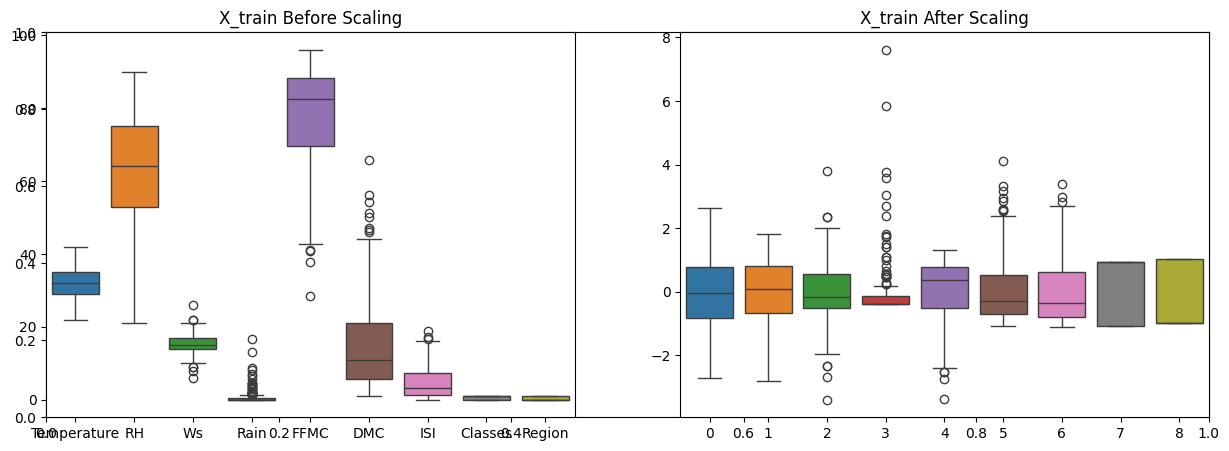

In [31]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression Model

Mean absolute error 0.5838063599546975
R2 Score 0.983523052949508


Text(0, 0.5, 'y_pred')

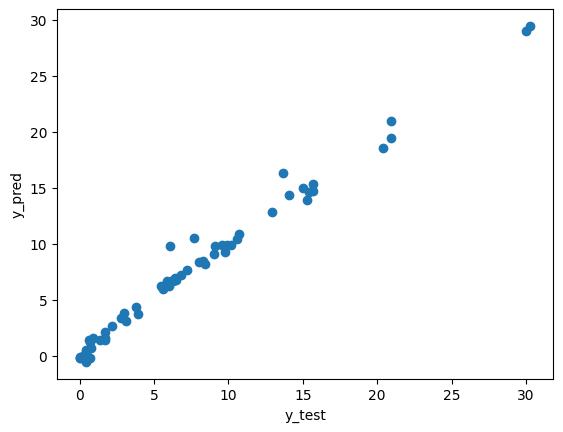

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)

y_pred=linreg.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(y_test,y_pred)

# Test and Prediction are alomost linear so we get good accuracy
plt.xlabel('y_test')
plt.ylabel('y_pred')

## Lasso Regression

Mean absolute error 1.1459979969391685
R2 Score 0.9497712193501188


Text(0, 0.5, 'y_pred')

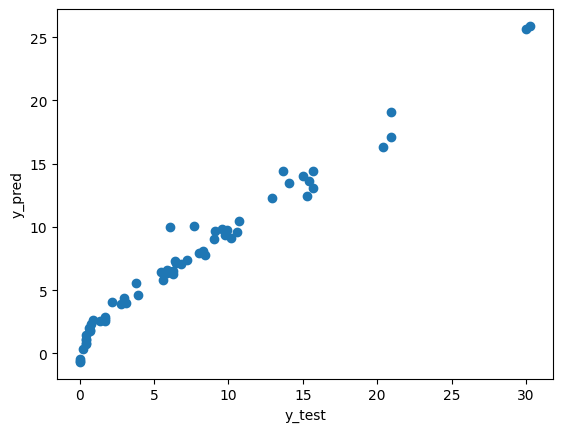

In [33]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso=Lasso()
lasso.fit(X_train_scaled,y_train)

y_pred=lasso.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

### Cross Validation Lasso

In [34]:
from sklearn.linear_model import LassoCV

# For Large Data set use cv=10
lassocv=LassoCV(cv=5)

lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

Mean absolute error 0.6701641696301904
R2 Score 0.9808648686248684


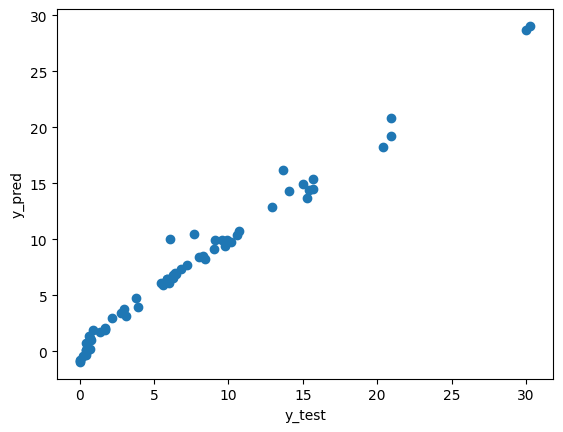

In [35]:
y_pred=lassocv.predict(X_test_scaled)

plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

## Ridge Regression model

Mean absolute error 0.6125515638101033
R2 Score 0.9826983552292979


Text(0, 0.5, 'y_pred')

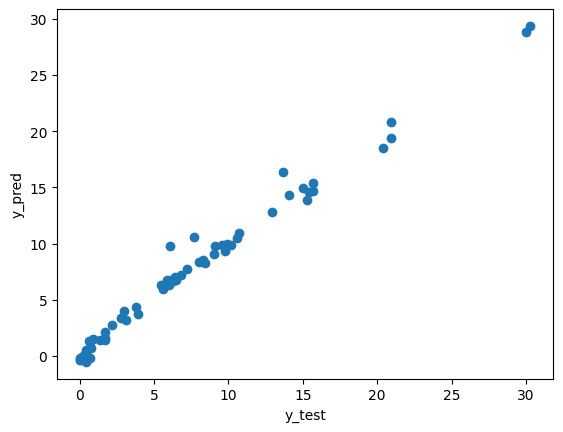

In [36]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge=Ridge()
ridge.fit(X_train_scaled,y_train)

y_pred=ridge.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

Mean absolute error 0.8566908888843273
R2 Score 0.9729928114396739


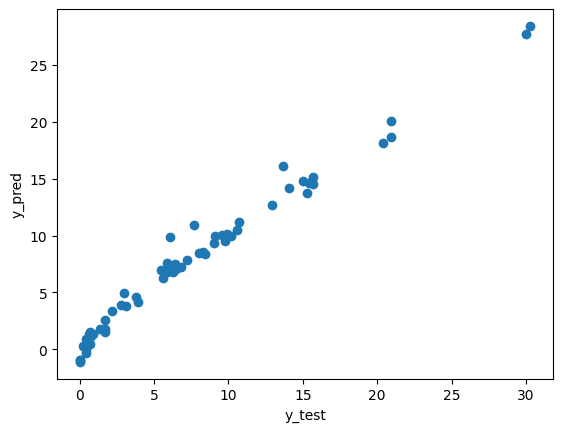

In [37]:
from sklearn.linear_model import RidgeCV

# For Large Data set use cv=10
ridgecv=RidgeCV(cv=5)

ridgecv.fit(X_train_scaled,y_train)

y_pred=ridgecv.predict(X_test_scaled)

plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [38]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## Elasticnet Regression

Mean absolute error 1.8915134363047037
R2 Score 0.8731354681001338


Text(0, 0.5, 'y_pred')

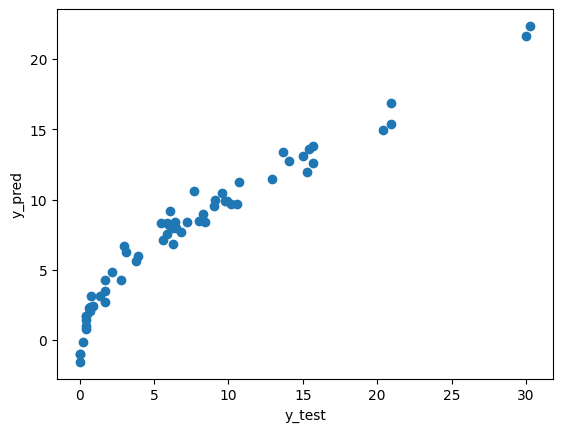

In [39]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)

y_pred=elastic.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

# scatter plot are not perfectly Linear thats why accuarcy are reduced
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

Mean absolute error 0.7295307419548667
R2 Score 0.9789324233433637


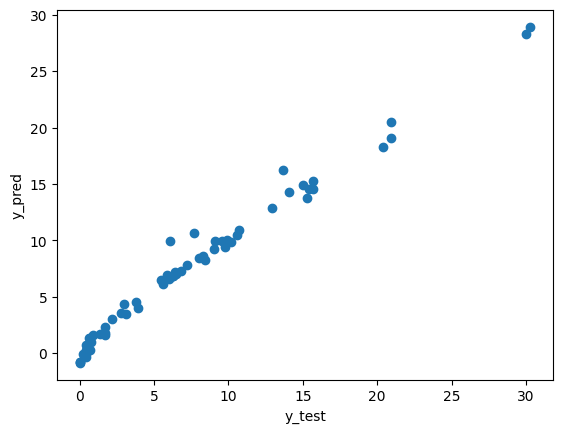

In [40]:
from sklearn.linear_model import ElasticNetCV

# For Large Data set use cv=10
elasticcv=ElasticNetCV(cv=5)

elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)

plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

In [41]:
elasticcv.alphas_

array([13.89895066, 12.9622079 , 12.08859847, 11.2738674 , 10.51404647,
        9.80543492,  9.14458143,  8.52826724,  7.95349058,  7.41745193,
        6.9175405 ,  6.45132142,  6.01652395,  5.61103037,  5.2328657 ,
        4.88018807,  4.55127972,  4.2445387 ,  3.958471  ,  3.6916833 ,
        3.44287621,  3.21083787,  2.99443815,  2.79262304,  2.60440959,
        2.4288811 ,  2.26518264,  2.11251691,  1.97014035,  1.83735948,
        1.7135276 ,  1.59804157,  1.49033892,  1.38989507,  1.29622079,
        1.20885985,  1.12738674,  1.05140465,  0.98054349,  0.91445814,
        0.85282672,  0.79534906,  0.74174519,  0.69175405,  0.64513214,
        0.60165239,  0.56110304,  0.52328657,  0.48801881,  0.45512797,
        0.42445387,  0.3958471 ,  0.36916833,  0.34428762,  0.32108379,
        0.29944381,  0.2792623 ,  0.26044096,  0.24288811,  0.22651826,
        0.21125169,  0.19701403,  0.18373595,  0.17135276,  0.15980416,
        0.14903389,  0.13898951,  0.12962208,  0.12088598,  0.11

In [42]:
elasticcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

### Conclusion
What ever give Highest Accuracy use that model for better Performance

### Ridge Regression Give Good Result

## Pickle the Machine learning models, Preprocessing model standardscaler

In [43]:
scaler

StandardScaler()

In [44]:
ridge

Ridge()

## For Prediction of New data we use pickle

In [45]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))